In [1]:
import pandas as pd
import os

# 현재 파이썬 코드의 파일 경로
current_path = os.getcwd()  # 현재 작업 디렉토리를 가져옵니다.

# CSV 파일 경로
file_path = os.path.join(current_path, 'filtered_data.csv')  # User uploaded fioytle to this path

df = pd.read_csv(file_path)
df

,note_id,person_id,age,gender_source_value,BMI,admission_department,division,ward,asa_class,surgeon_id,...,condition_source_value,surgery_room,previous_surgery,emergency_status,op_timing,day_of_the_week,week_of_the_month,month,surgeon_estimated_op_time,surgery_duration
0,101058,29,81,F,25.247087,General Surgery,Admission,NUGW2,2,9885,...,D00002196,203,N,N,TF2,Thursday,4,October,130,66
1,57801,64,60,F,24.376249,Otolaryngology,Admission,102,2,6194,...,D00003798,504,N,N,8A,Friday,2,January,300,130
2,71288,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF4,Monday,4,April,100,85
3,135104,64,60,F,24.376249,Otolaryngology,Admission,102,3,6194,...,D00003798,504,Y,N,TF2,Monday,3,August,100,83
4,221210,71,94,M,27.963140,Orthopedics,Admission,41,2,29473,...,D00018711,108,N,N,TF4,Monday,5,March,100,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161214,297111,4055249,1,M,23.700428,Pediatric Surgery,Admission,5A,1,100613,...,D00011688,5,N,Y,etc,Tuesday,2,September,200,123
161215,297455,4055328,1,M,20.612160,Pediatric Urology,Day,PDSC,1,6259,...,D00016707,7,N,N,8A,Monday,4,September,130,45
161216,297761,4055407,1,M,12.502703,Pediatric Surgery,Admission,5A,2,105057,...,D00011524,5,N,N,8A,Wednesday,3,September,130,43
161217,297753,4055558,4,F,14.365794,Pediatric Surgery,Admission,5A,2,105057,...,D00004831,5,N,N,TF6,Wednesday,3,September,130,82


##### 'surgical_department'와 실제 수술기간('surgery_duration')과의 관계 분석

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13508\670271828.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='surgical_department', y='surgery_duration', data=adult_department_data, palette=custom_palette)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13508\670271828.py:22: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='surgical_department', y='surgery_duration', data=adult_department_data, palette=custom_palette)


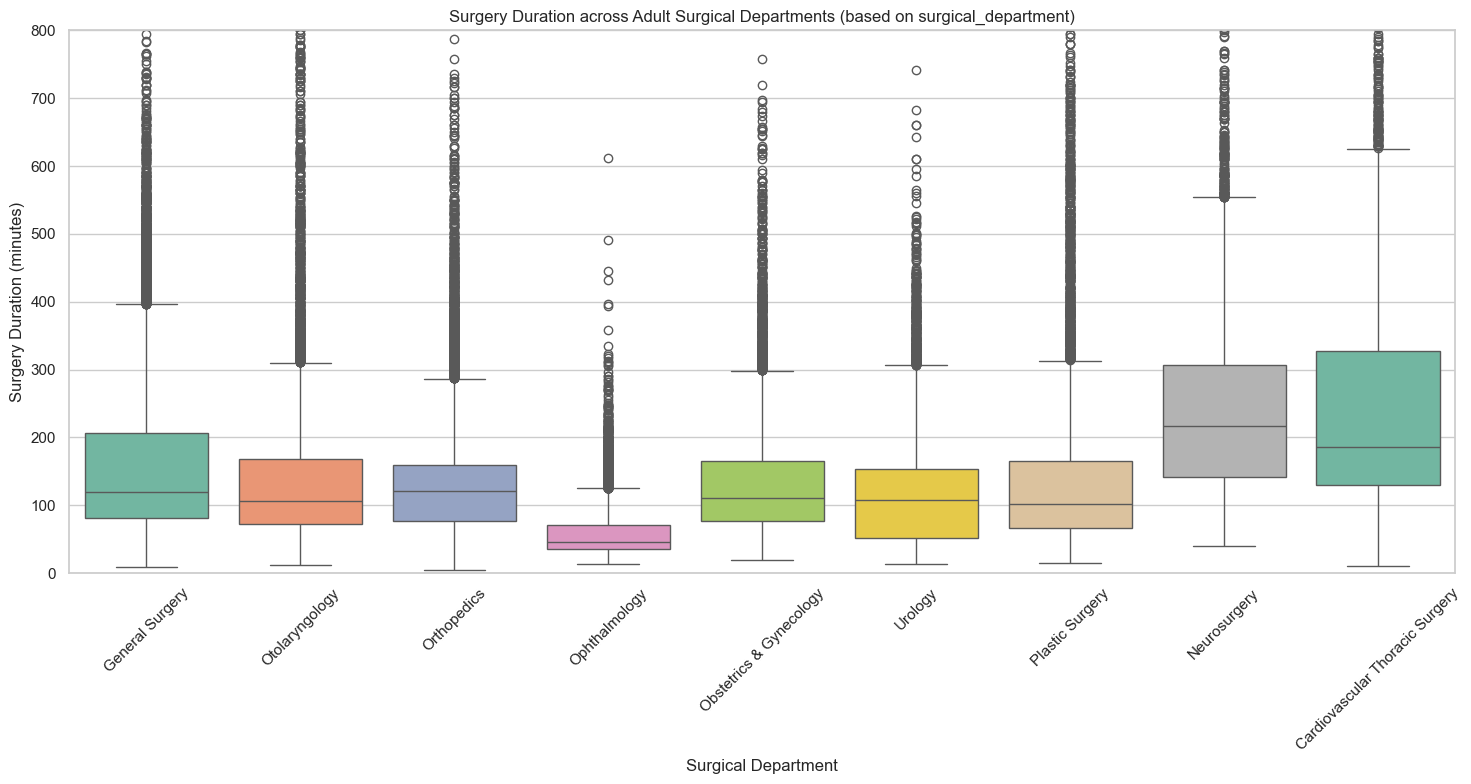

(array(['General Surgery', 'Otolaryngology', 'Orthopedics',
        'Ophthalmology', 'Obstetrics & Gynecology', 'Urology',
        'Plastic Surgery', 'Neurosurgery',
        'Cardiovascular Thoracic Surgery'], dtype=object),
 None)

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# 진료과명에 '소아과'가 기재되어 있는지 여부에 따라 외과를 소아과와 성인과로 분류
# Categorizing 'surgical_department' into Pediatric and Adult
df['surgical_department_category'] = df['surgical_department'].apply(lambda x: 'Pediatric' if 'Pediatric' in x else 'Adult')

# Separating the dataset for Adult surgical departments based on 'surgical_department'
adult_department_data = df[df['surgical_department_category'] == 'Adult']

# Checking unique adult surgical departments
unique_adult_surgical_departments = adult_department_data['surgical_department'].unique()

# Define a custom color palette
custom_palette = sns.color_palette("Set2")

# Creating a boxplot for the revised column with custom colors
plt.figure(figsize=(15, 8))
plt.ylim(0, 800)
sns.boxplot(x='surgical_department', y='surgery_duration', data=adult_department_data, palette=custom_palette)
plt.xticks(rotation=45)
plt.title('Surgery Duration across Adult Surgical Departments (based on surgical_department)')
plt.xlabel('Surgical Department')
plt.ylabel('Surgery Duration (minutes)')
plt.tight_layout()

# Displaying the unique adult surgical departments and the plot
unique_adult_surgical_departments, plt.show()

The boxplot visually represents the distribution of surgery durations across various Adult surgical departments. It shows the range, median, and potential outliers in surgery duration for each department. From this visualization, you can observe variations in surgery duration between different departments, which can be informative for understanding department-specific trends and patterns in surgical procedures.  
This visualization provides insights into the range, median, and potential outliers in surgery duration for each department, helping to understand the variations and trends specific to each type of surgical department.

### Cumulative Distribution Function (CDF) Plot

This plot can show the proportion of surgeries in each department that are completed within a given duration, which is helpful for understanding the distribution of surgery times.

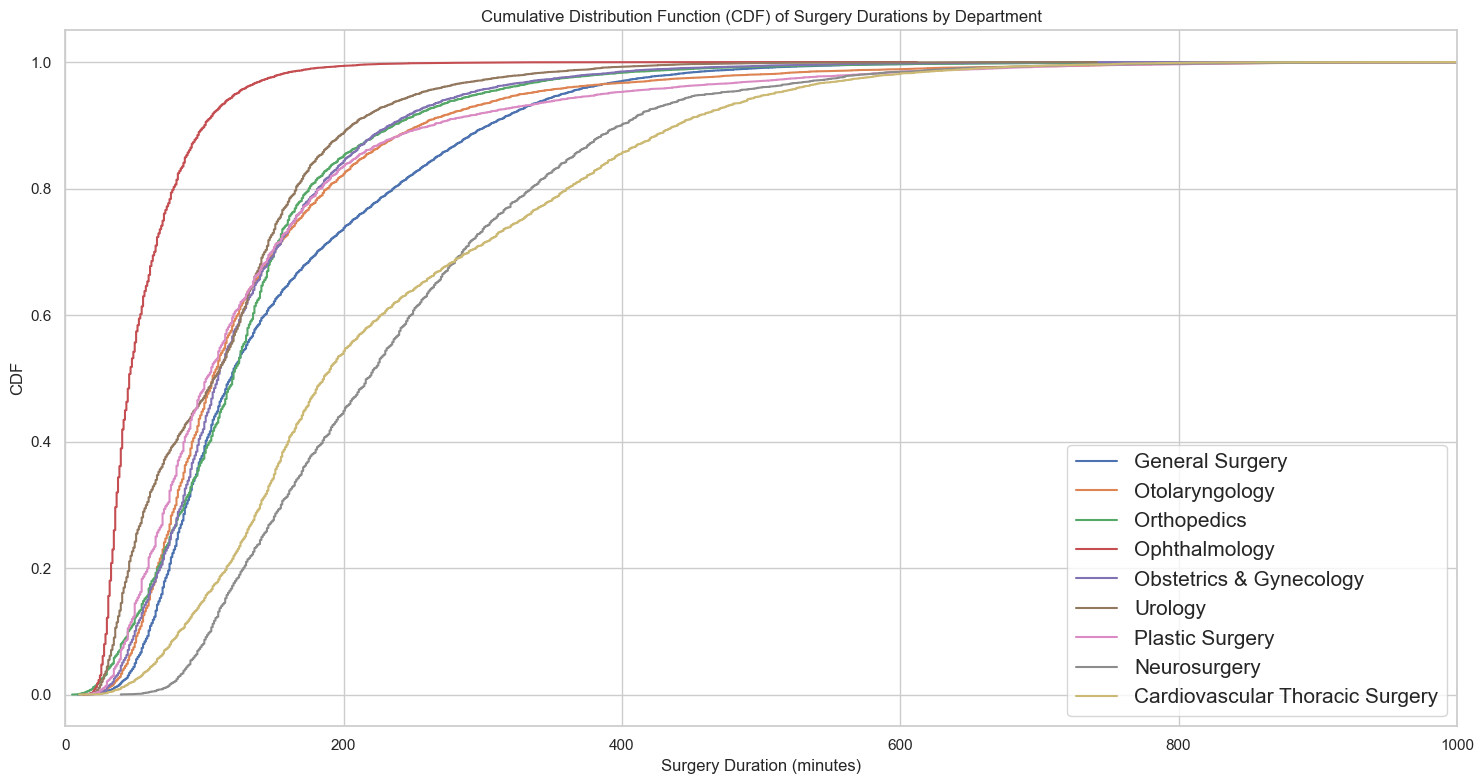

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Preparing data for CDF plots
cdf_data = {}
for department in unique_adult_surgical_departments:
    department_data = adult_department_data[adult_department_data['surgical_department'] == department]['surgery_duration']
    cdf_data[department] = np.sort(department_data)

# Creating CDF plots for each department
plt.figure(figsize=(15, 8))

for department, durations in cdf_data.items():
    # Calculate the CDF
    n = len(durations)
    y = np.arange(1, n+1) / n
    plt.plot(durations, y, label=department)
    
plt.xlim(0, 1000)
plt.title('Cumulative Distribution Function (CDF) of Surgery Durations by Department')
plt.xlabel('Surgery Duration (minutes)')
plt.ylabel('CDF')
plt.legend(loc='best', prop={'size': 15})  # 폰트 크기 조절
plt.grid(True)
plt.tight_layout()

# Displaying the plot
plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13508\933422196.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_department_data['duration_bin'] = pd.cut(adult_department_data['surgery_duration'], bins)


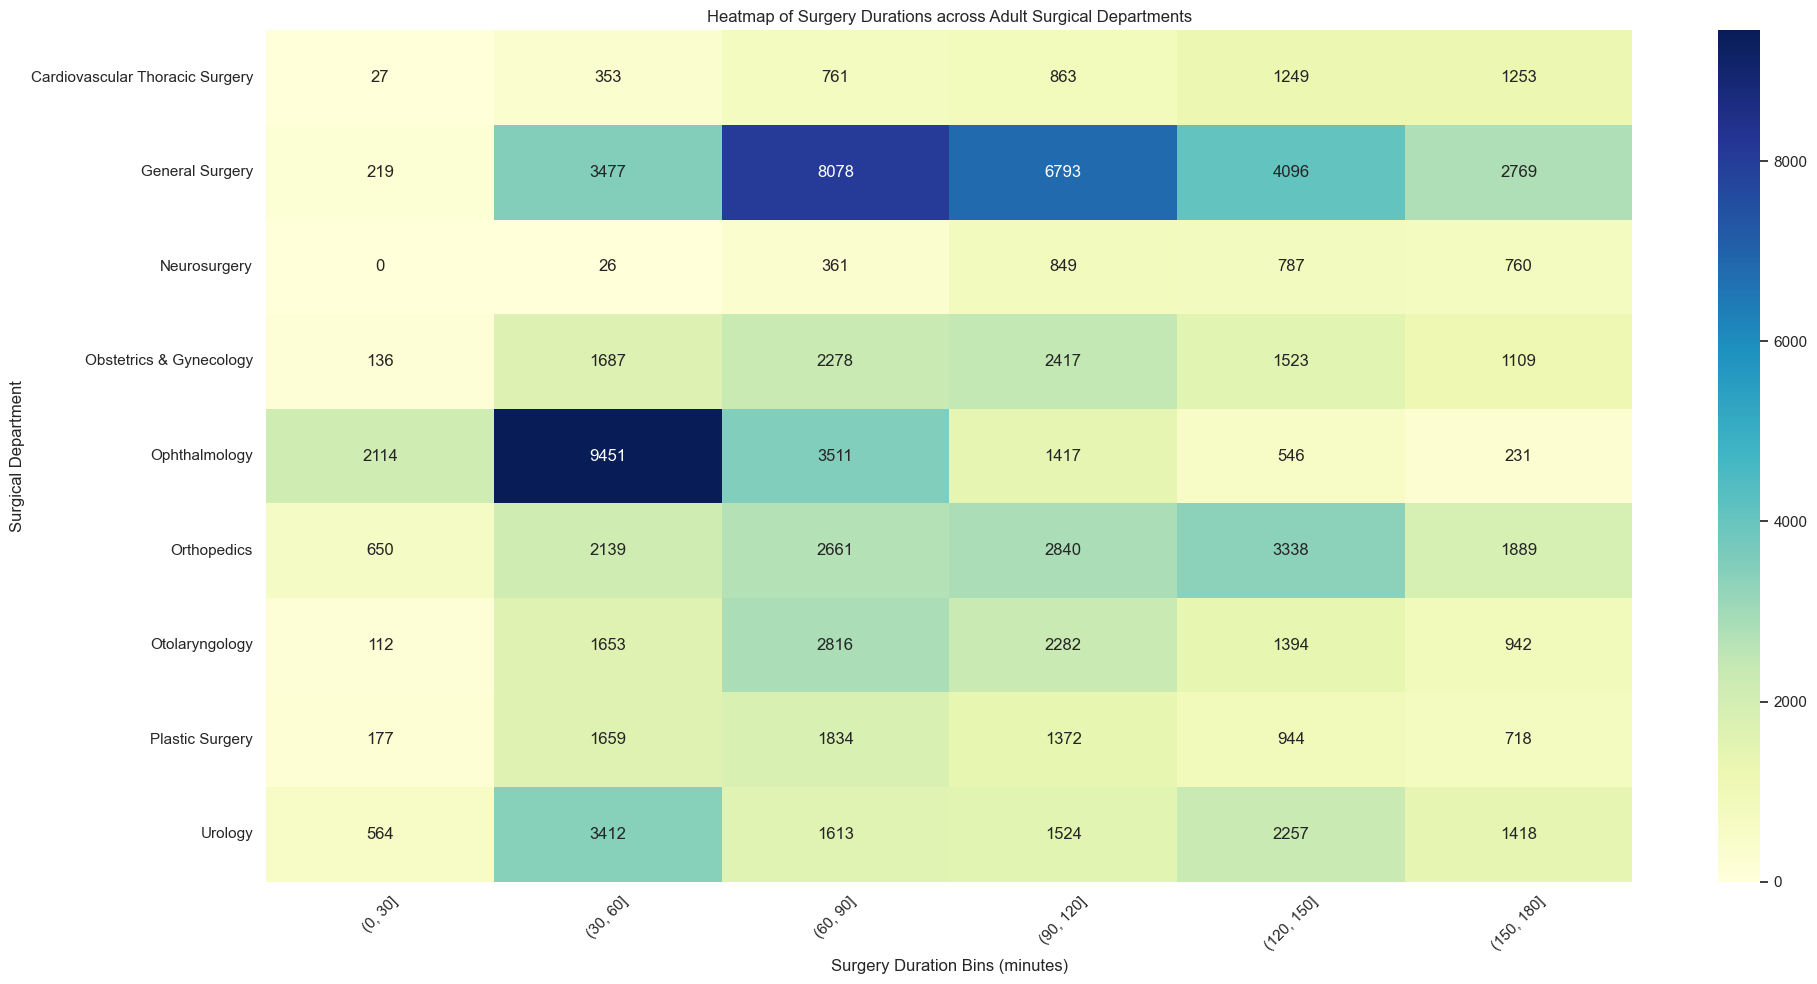

In [23]:
import numpy as np

# Creating a pivot table for the heatmap
# Using surgery_duration as values, surgical_department as rows, and creating bins for surgery_duration as columns
bins = np.arange(0, 180 + 30, 30)  # Binning in 30-minute intervals up to 800 minutes
adult_department_data['duration_bin'] = pd.cut(adult_department_data['surgery_duration'], bins)

heatmap_data = adult_department_data.pivot_table(index='surgical_department', 
                                                 columns='duration_bin', 
                                                 values='surgery_duration', 
                                                 aggfunc='count', 
                                                 fill_value=0)

# Creating the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Surgery Durations across Adult Surgical Departments')
plt.xlabel('Surgery Duration Bins (minutes)')
plt.ylabel('Surgical Department')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Displaying the plot
plt.show()


In [25]:
# Categorizing 'surgical_department' into Pediatric and Adult
df['surgical_department_category'] = df['surgical_department'].apply(lambda x: 'Pediatric' if 'Pediatric' in x else 'Adult')

# Separating the dataset for Pediatric surgical departments based on 'surgical_department'
pediatric_department_data = df[df['surgical_department_category'] == 'Pediatric']
unique_pediatric_surgical_departments = pediatric_department_data['surgical_department'].unique()

# Displaying unique pediatric departments for confirmation
unique_pediatric_surgical_departments

array(['Pediatric Otolaryngology', 'Pediatric Orthopedics',
       'Pediatric Thoracic Surgery', 'Pediatric Urology',
       'Pediatric Surgery', 'Pediatric Ophthalmology',
       'Pediatric Plastic Surgery', 'Pediatric Neurosurgery'],
      dtype=object)

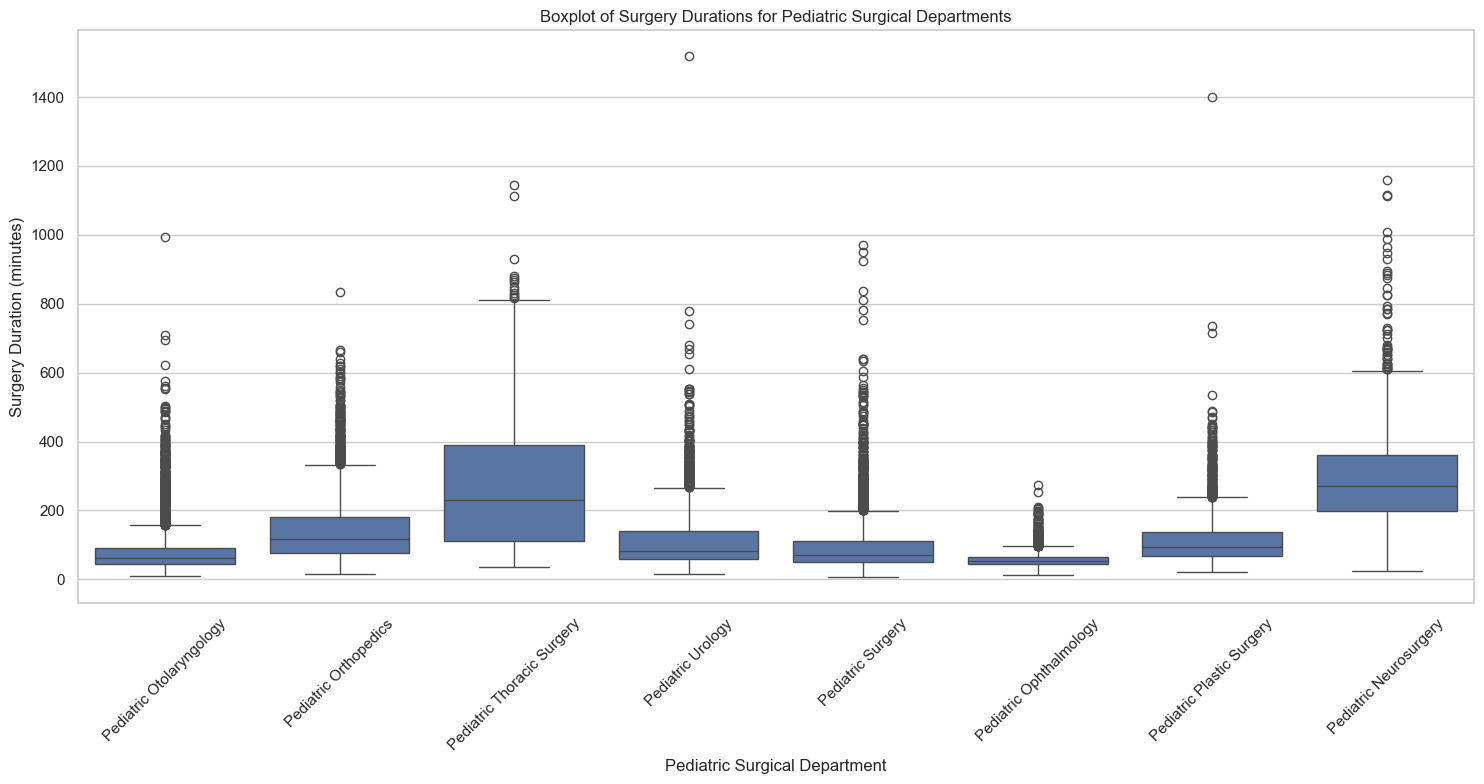

In [26]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='surgical_department', y='surgery_duration', data=pediatric_department_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Surgery Durations for Pediatric Surgical Departments')
plt.xlabel('Pediatric Surgical Department')
plt.ylabel('Surgery Duration (minutes)')
plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_13508\4154435679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pediatric_department_data['duration_bin'] = pd.cut(pediatric_department_data['surgery_duration'], bins_pediatric)


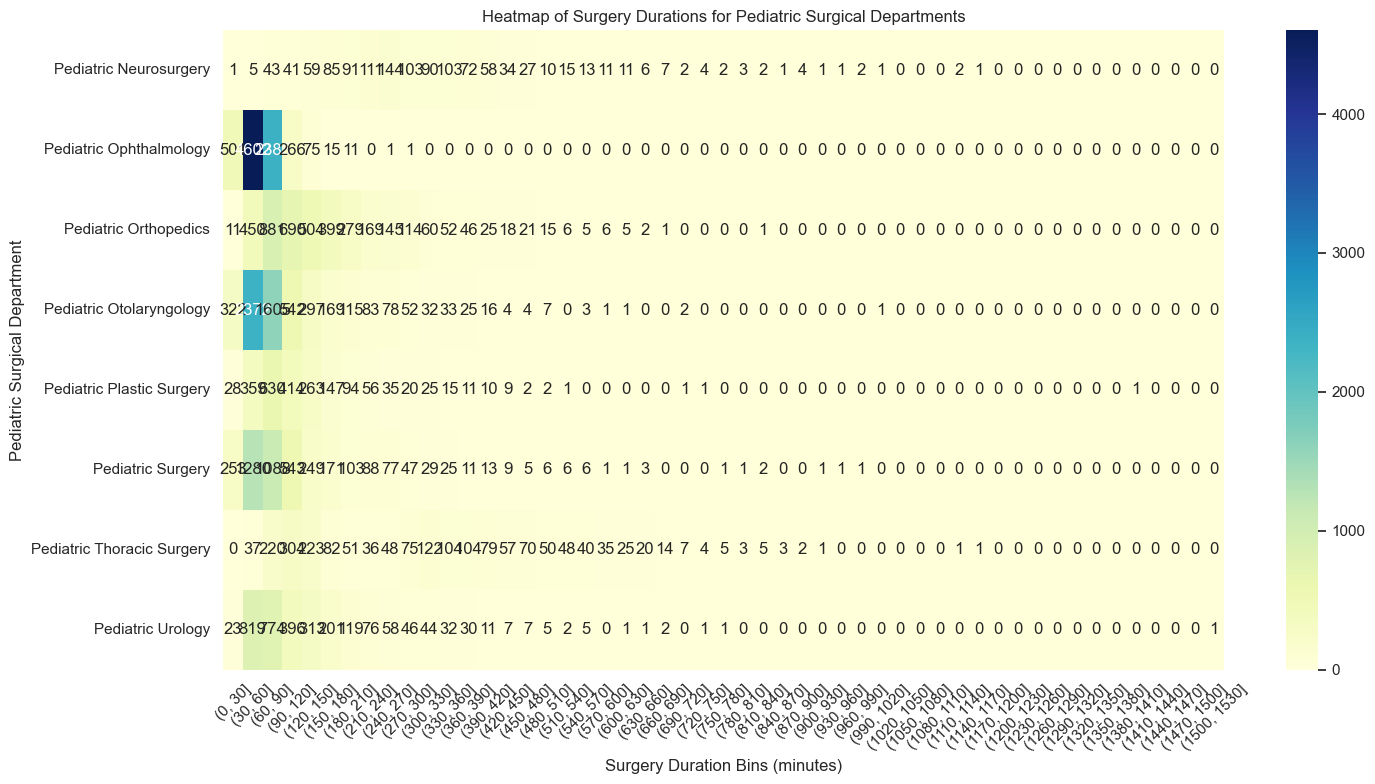

In [27]:
bins_pediatric = np.arange(0, pediatric_department_data['surgery_duration'].max() + 30, 30)
pediatric_department_data['duration_bin'] = pd.cut(pediatric_department_data['surgery_duration'], bins_pediatric)
heatmap_data_pediatric = pediatric_department_data.pivot_table(index='surgical_department', columns='duration_bin', 
                                                               values='surgery_duration', aggfunc='count', fill_value=0)
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data_pediatric, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Surgery Durations for Pediatric Surgical Departments')
plt.xlabel('Surgery Duration Bins (minutes)')
plt.ylabel('Pediatric Surgical Department')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

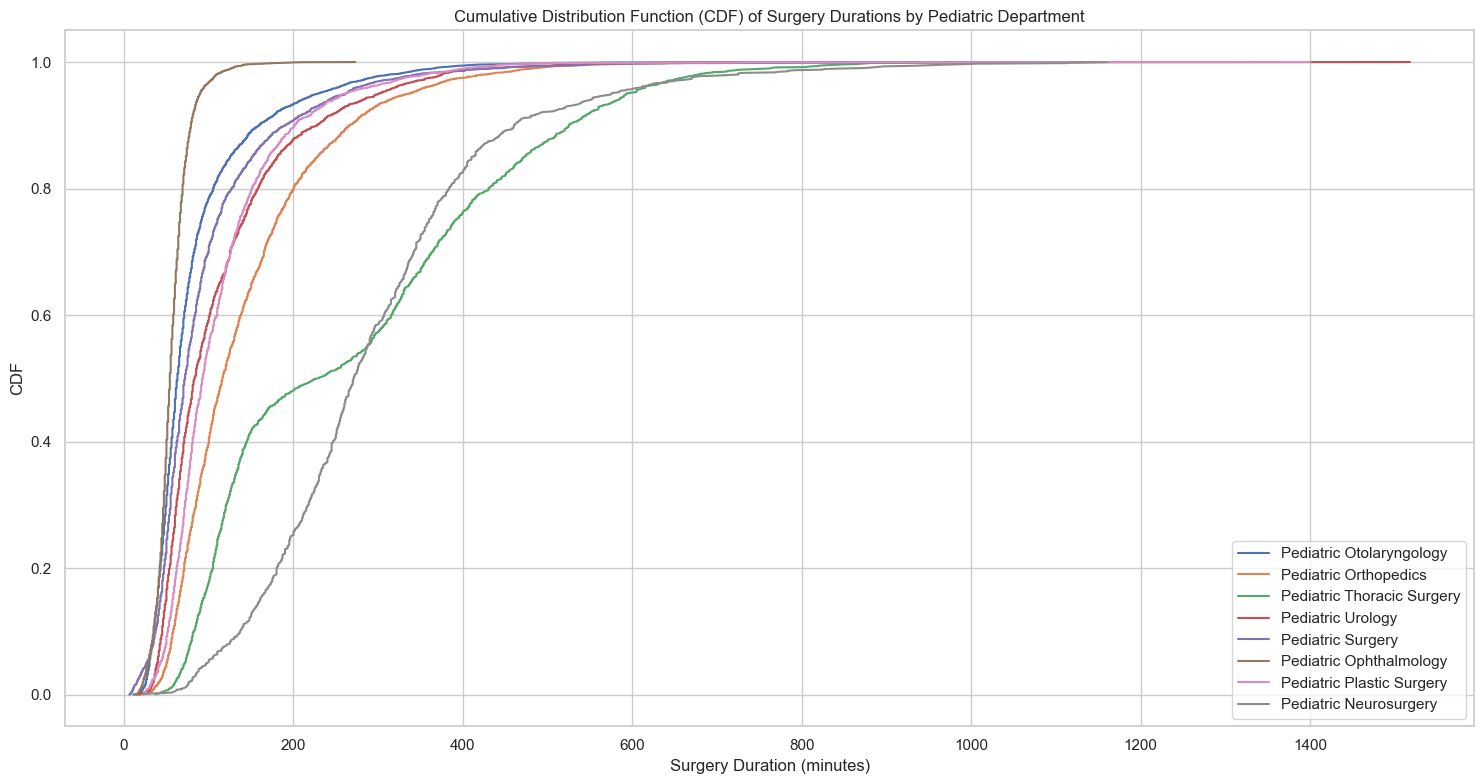

In [28]:
cdf_data_pediatric = {}
for department in unique_pediatric_surgical_departments:
    department_data = pediatric_department_data[pediatric_department_data['surgical_department'] == department]['surgery_duration']
    cdf_data_pediatric[department] = np.sort(department_data)
plt.figure(figsize=(15, 8))
for department, durations in cdf_data_pediatric.items():
    n = len(durations)
    y = np.arange(1, n+1) / n
    plt.plot(durations, y, label=department)
plt.title('Cumulative Distribution Function (CDF) of Surgery Durations by Pediatric Department')
plt.xlabel('Surgery Duration (minutes)')
plt.ylabel('CDF')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


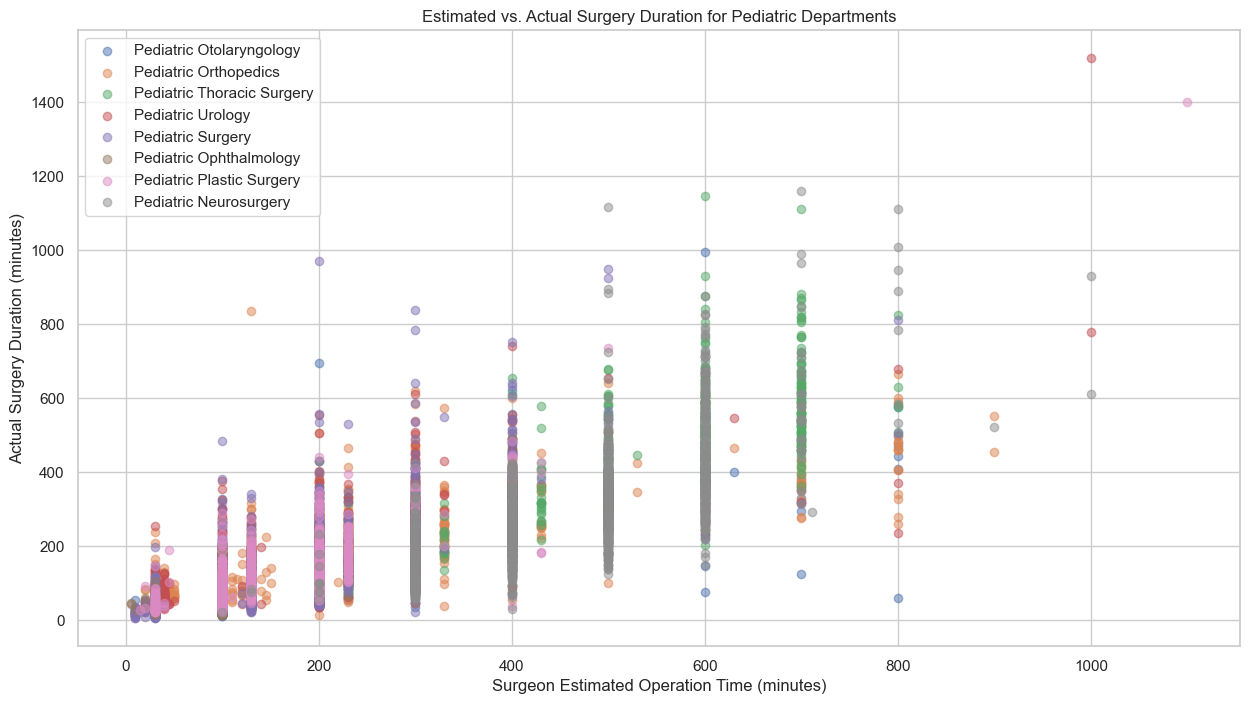

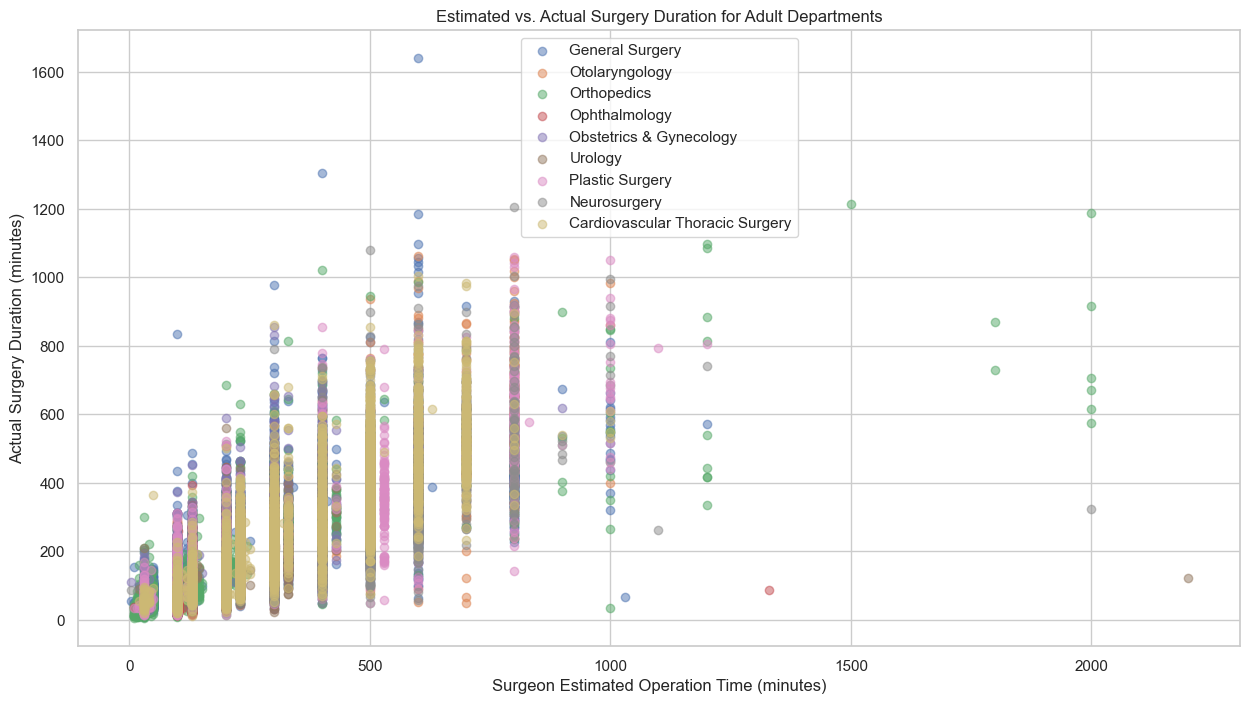

(                           surgeon_estimated_op_time                     \
                                                 mean median         std   
 surgical_department                                                       
 Pediatric Neurosurgery                    461.553173  500.0  117.282492   
 Pediatric Ophthalmology                    98.785796  100.0   14.668635   
 Pediatric Orthopedics                     186.879641  130.0  120.911840   
 Pediatric Otolaryngology                  131.907356  100.0   81.055092   
 Pediatric Plastic Surgery                 157.883710  100.0   98.783372   
 Pediatric Surgery                         137.886098  100.0   89.940599   
 Pediatric Thoracic Surgery                359.690832  300.0  189.790089   
 Pediatric Urology                         154.872269  100.0   98.100575   
 
                            surgery_duration                     
                                        mean median         std  
 surgical_department          

In [30]:
# Analyzing Pediatric and Adult departments separately

# Separating the dfset for Pediatric and Adult surgical departments
pediatric_df = df[df['surgical_department_category'] == 'Pediatric']
adult_df = df[df['surgical_department_category'] == 'Adult']

# Basic statistics for Pediatric departments
pediatric_stats = pediatric_df[['surgical_department', 'surgeon_estimated_op_time', 'surgery_duration']].groupby('surgical_department').agg(['mean', 'median', 'std'])

# Basic statistics for Adult departments
adult_stats = adult_df[['surgical_department', 'surgeon_estimated_op_time', 'surgery_duration']].groupby('surgical_department').agg(['mean', 'median', 'std'])

# Creating scatter plots for Pediatric departments
plt.figure(figsize=(15, 8))
for department in pediatric_df['surgical_department'].unique():
    department_df = pediatric_df[pediatric_df['surgical_department'] == department]
    plt.scatter(department_df['surgeon_estimated_op_time'], department_df['surgery_duration'], label=department, alpha=0.5)

plt.title('Estimated vs. Actual Surgery Duration for Pediatric Departments')
plt.xlabel('Surgeon Estimated Operation Time (minutes)')
plt.ylabel('Actual Surgery Duration (minutes)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Creating scatter plots for Adult departments
plt.figure(figsize=(15, 8))
for department in adult_df['surgical_department'].unique():
    department_df = adult_df[adult_df['surgical_department'] == department]
    plt.scatter(department_df['surgeon_estimated_op_time'], department_df['surgery_duration'], label=department, alpha=0.5)

plt.title('Estimated vs. Actual Surgery Duration for Adult Departments')
plt.xlabel('Surgeon Estimated Operation Time (minutes)')
plt.ylabel('Actual Surgery Duration (minutes)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

pediatric_stats, adult_stats


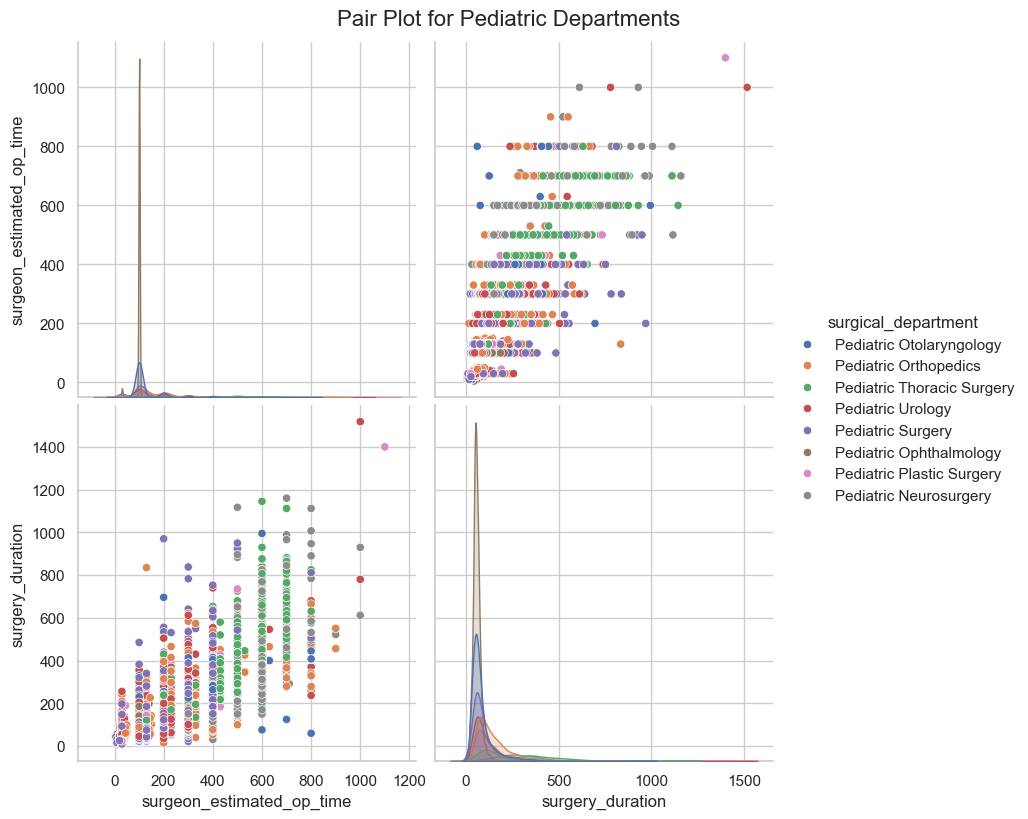

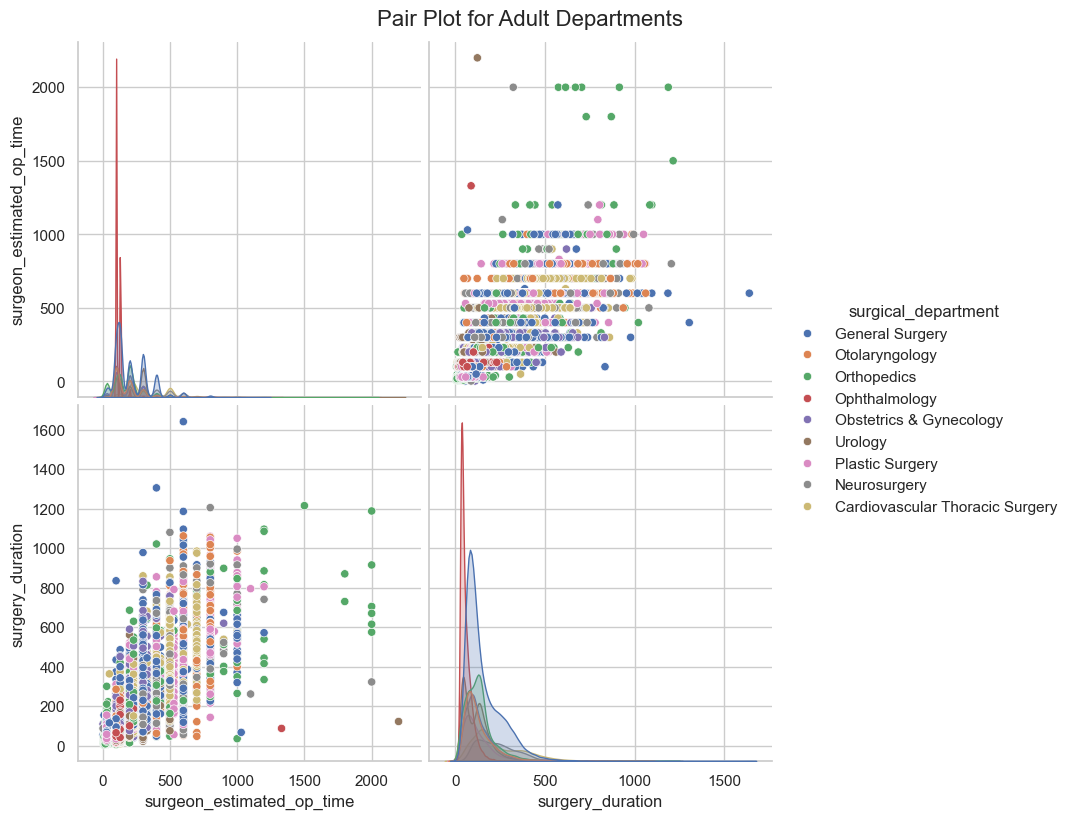

In [32]:
# Analyzing Pediatric and Adult departments separately


# Separating the dataset for Pediatric and Adult surgical departments
pediatric_data = df[df['surgical_department_category'] == 'Pediatric']
adult_data = df[df['surgical_department_category'] == 'Adult']

# Basic statistics for Pediatric departments
pediatric_stats = pediatric_data[['surgical_department', 'surgeon_estimated_op_time', 'surgery_duration']].groupby('surgical_department').agg(['mean', 'median', 'std'])

# Basic statistics for Adult departments
adult_stats = adult_data[['surgical_department', 'surgeon_estimated_op_time', 'surgery_duration']].groupby('surgical_department').agg(['mean', 'median', 'std'])

# Creating Pair Plots to visualize the relationship between estimated and actual surgery times in Pediatric and Adult departments

# Pair Plot for Pediatric Departments
sns.pairplot(pediatric_data, hue='surgical_department', vars=['surgeon_estimated_op_time', 'surgery_duration'], height=4)
plt.suptitle('Pair Plot for Pediatric Departments', size=16, y=1.02)
plt.show()

# Pair Plot for Adult Departments
sns.pairplot(adult_data, hue='surgical_department', vars=['surgeon_estimated_op_time', 'surgery_duration'], height=4)
plt.suptitle('Pair Plot for Adult Departments', size=16, y=1.02)
plt.show()


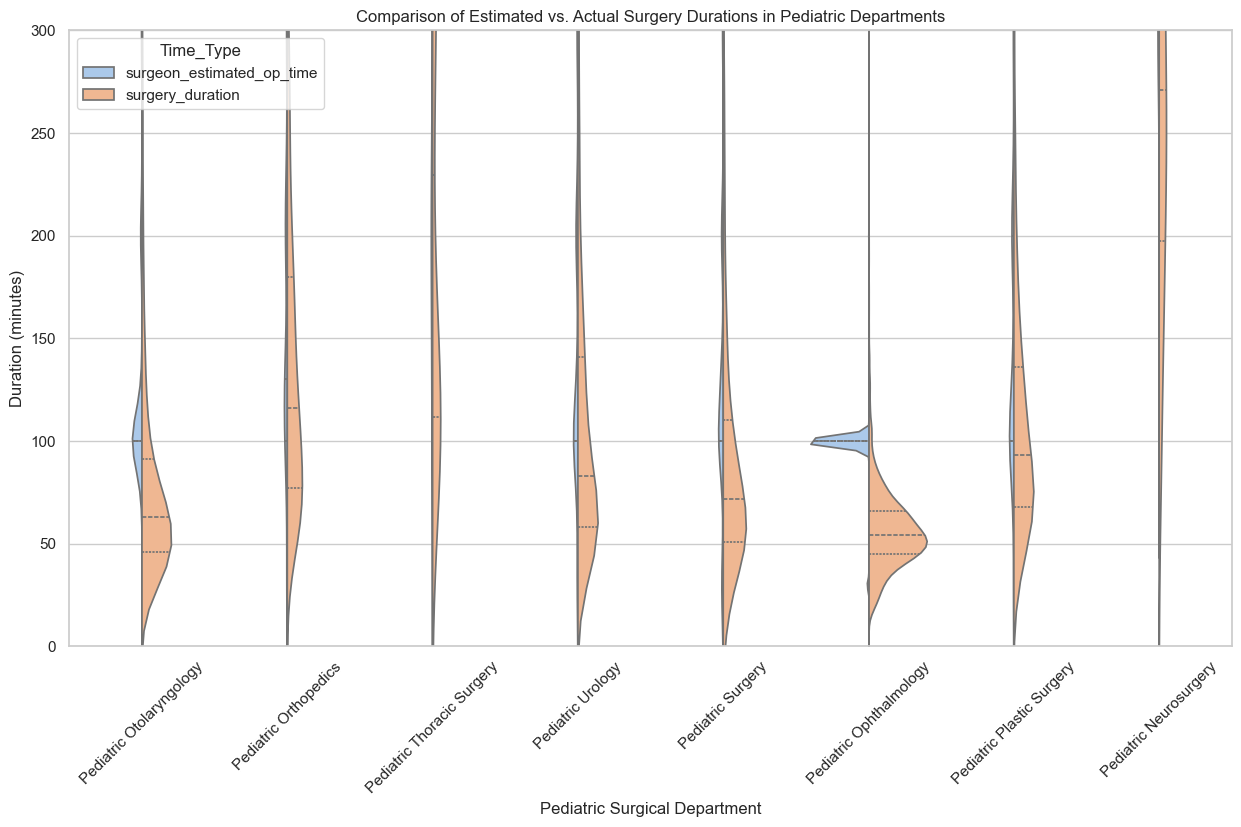

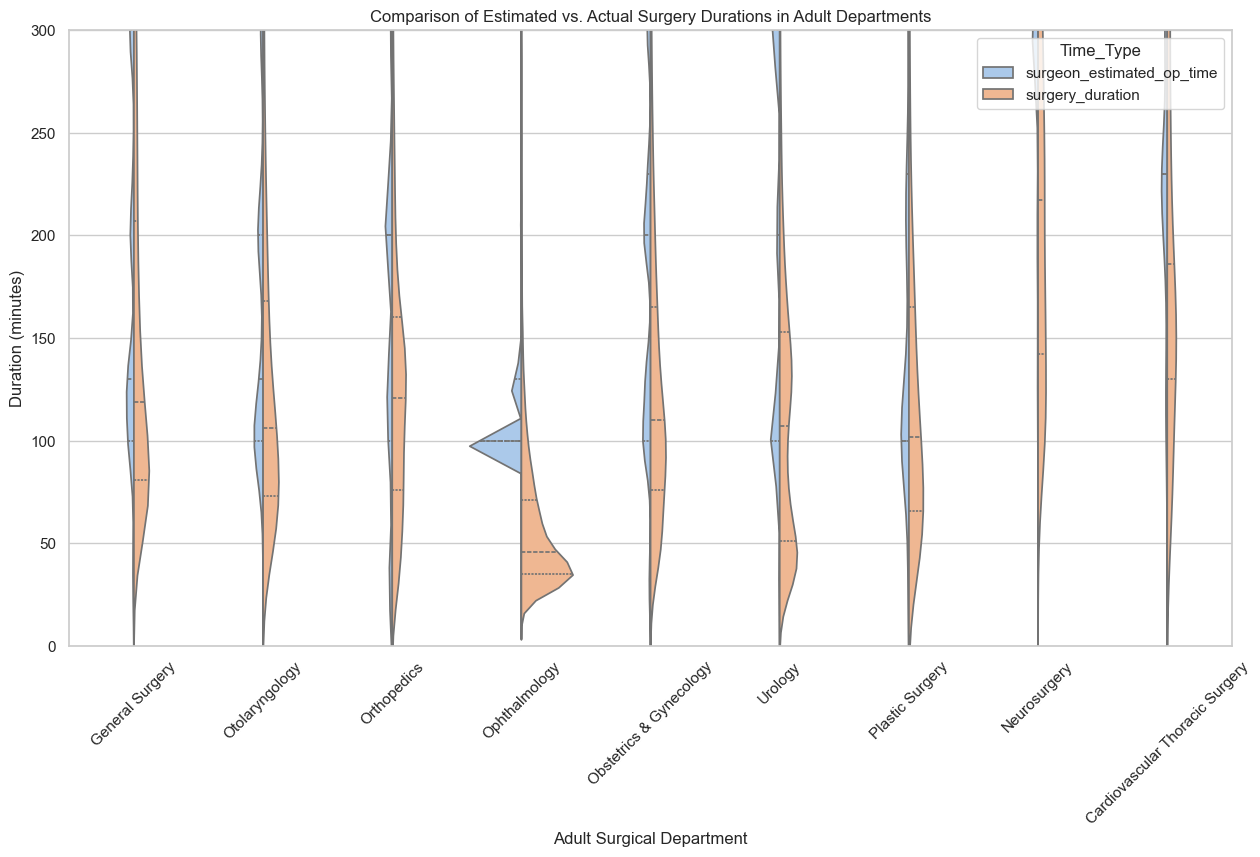

In [36]:
# Creating side-by-side Violin Plots to compare the distribution of estimated vs. actual surgery durations

# Preparing the data for Pediatric and Adult departments
pediatric_melted = pediatric_data.melt(id_vars='surgical_department', value_vars=['surgeon_estimated_op_time', 'surgery_duration'], var_name='Time_Type', value_name='Duration')
adult_melted = adult_data.melt(id_vars='surgical_department', value_vars=['surgeon_estimated_op_time', 'surgery_duration'], var_name='Time_Type', value_name='Duration')

# Violin Plot for Pediatric Departments
plt.figure(figsize=(15, 8))
plt.ylim(0,300)
sns.violinplot(x='surgical_department', y='Duration', hue='Time_Type', data=pediatric_melted, split=True, inner="quartile", palette="pastel")
plt.title('Comparison of Estimated vs. Actual Surgery Durations in Pediatric Departments')
plt.xlabel('Pediatric Surgical Department')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

# Violin Plot for Adult Departments
plt.figure(figsize=(15, 8))
plt.ylim(0,300)

sns.violinplot(x='surgical_department', y='Duration', hue='Time_Type', data=adult_melted, split=True, inner="quartile", palette="pastel")
plt.title('Comparison of Estimated vs. Actual Surgery Durations in Adult Departments')
plt.xlabel('Adult Surgical Department')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


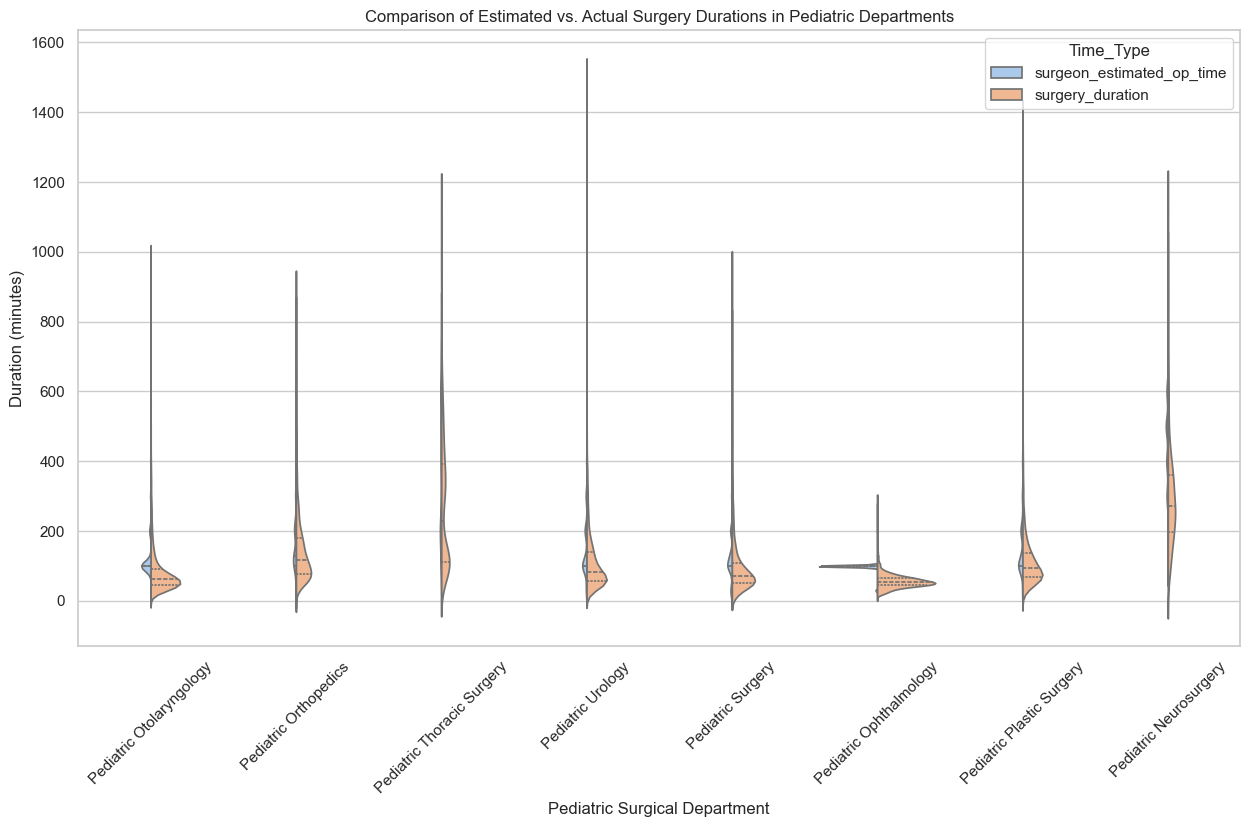

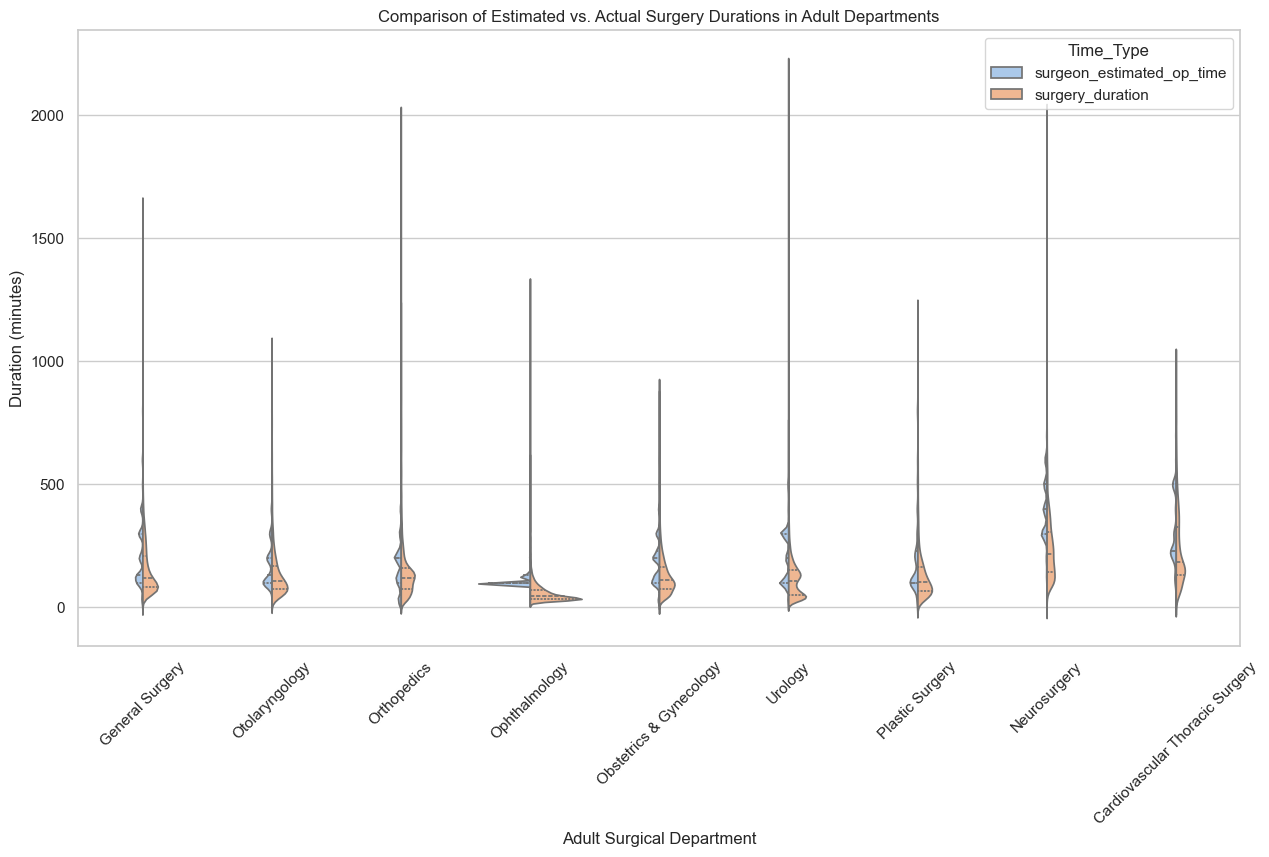

In [37]:
# Creating side-by-side Violin Plots to compare the distribution of estimated vs. actual surgery durations

# Preparing the data for Pediatric and Adult departments
pediatric_melted = pediatric_data.melt(id_vars='surgical_department', value_vars=['surgeon_estimated_op_time', 'surgery_duration'], var_name='Time_Type', value_name='Duration')
adult_melted = adult_data.melt(id_vars='surgical_department', value_vars=['surgeon_estimated_op_time', 'surgery_duration'], var_name='Time_Type', value_name='Duration')

# Violin Plot for Pediatric Departments
plt.figure(figsize=(15, 8))
sns.violinplot(x='surgical_department', y='Duration', hue='Time_Type', data=pediatric_melted, split=True, inner="quartile", palette="pastel")
plt.title('Comparison of Estimated vs. Actual Surgery Durations in Pediatric Departments')
plt.xlabel('Pediatric Surgical Department')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()

# Violin Plot for Adult Departments
plt.figure(figsize=(15, 8))
sns.violinplot(x='surgical_department', y='Duration', hue='Time_Type', data=adult_melted, split=True, inner="quartile", palette="pastel")
plt.title('Comparison of Estimated vs. Actual Surgery Durations in Adult Departments')
plt.xlabel('Adult Surgical Department')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()
